## Deskriptive Statistiken
### Autor: Dr. Yves Staudt
Bevor wir nun weiter mit der Datenaufbereitung fahren, ist es wichtig ein gutes Verständnis der Daten zu haben. Für diesen Zweck sind deskriptive Statitiken und Visualiserungen wie Histogramme und Boxplots von grossem Interesse.

## Loading Packages

In [1]:
!pip install seaborn

import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
#import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns

# for Q-Q plots
import scipy.stats as stats
# from feature-engine
# from feature-engine
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer,
)

import plotly.express as px
# import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.figure_factory import create_scatterplotmatrix
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "vscode"


# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Laden der Daten

In [2]:
X_train = pd.read_csv("Xtrain_booking.csv")
X_test = pd.read_csv("Xtest_booking.csv")
ytrain = pd.read_csv("ytrain_booking.csv")
ytest = pd.read_csv("ytest_booking.csv")
print("Shape of X Train: {}".format(X_train.shape))
print("Shape of X Test: {}".format(X_test.shape))
print("Shape of y Train: {}".format(ytrain.shape))
print("Shape of y Test: {}".format(ytest.shape))

FileNotFoundError: [Errno 2] No such file or directory: 'Xtrain_booking.csv'

## Variablen Übersicht

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83573 non-null  object 
 1   lead_time                       83573 non-null  int64  
 2   arrival_date_year               83573 non-null  int64  
 3   arrival_date_month              83573 non-null  object 
 4   arrival_date_week_number        83573 non-null  int64  
 5   arrival_date_day_of_month       83573 non-null  int64  
 6   stays_in_weekend_nights         83573 non-null  int64  
 7   stays_in_week_nights            83573 non-null  int64  
 8   adults                          83573 non-null  int64  
 9   children                        83573 non-null  float64
 10  babies                          83573 non-null  int64  
 11  meal                            83573 non-null  object 
 12  country                         

In [ ]:
X_train.dtypes.value_counts()

int64      17
object     12
float64     2
Name: count, dtype: int64

## Deskriptive Statistics
In diesem Abschnitt werden wir Deskriptive Statistiken betrachten. Wegen Zeitgründen und Platzgründen werden wir nicht alle Daten anschauen können. Wir werden hier nur eine Auswahl von mir als interessante eingestufte Variablen Sehen.

### Hotel Variable

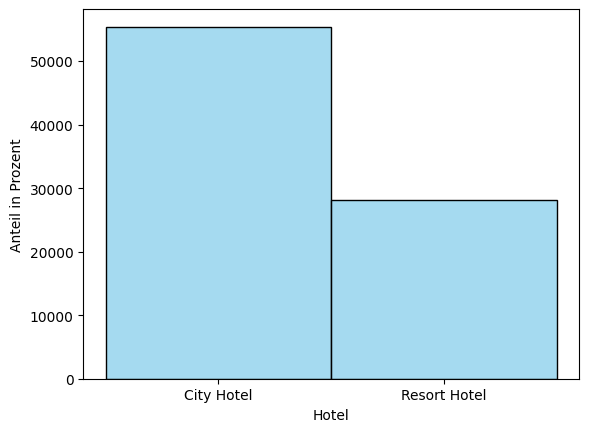

In [ ]:
# Create histogram using seaborn
sns.histplot(X_train['hotel'], kde=False, color='skyblue')

# Set x and y axis labels
plt.xlabel('Hotel')
plt.ylabel('Anteil in Prozent')

# Show the plot
plt.show()


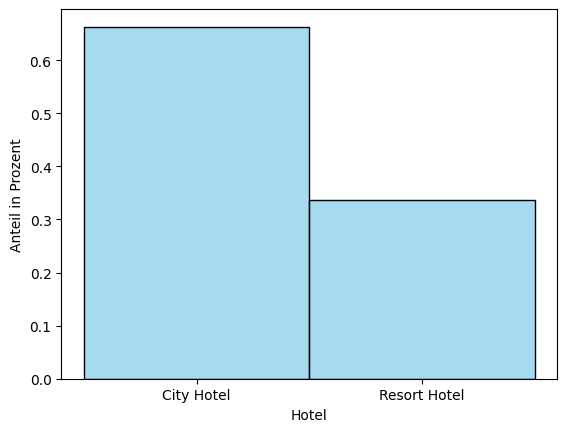

In [ ]:
# Create histogram using seaborn
sns.histplot(X_train['hotel'], kde=False, stat='density', color='skyblue')

# Set x and y axis labels
plt.xlabel('Hotel')
plt.ylabel('Anteil in Prozent')

# Show the plot
plt.show()

In [ ]:
print(X_train['hotel'].describe())

count          83573
unique             2
top       City Hotel
freq           55414
Name: hotel, dtype: object


### Lead Time - Vorbuchungsdauer

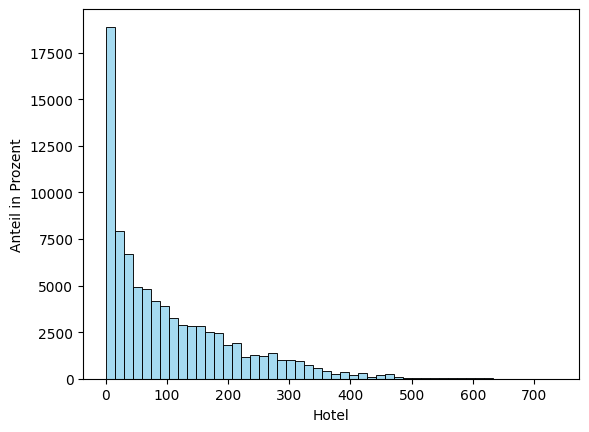

In [ ]:
# Create histogram using seaborn
sns.histplot(X_train['lead_time'], kde=False, color='skyblue',bins=50)

# Set x and y axis labels
plt.xlabel('Hotel')
plt.ylabel('Anteil in Prozent')

# Show the plot
plt.show()

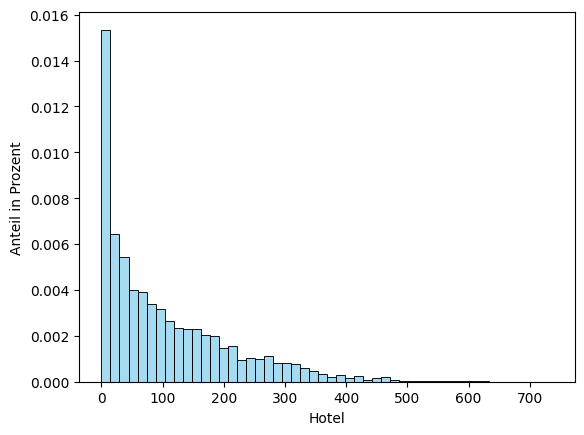

In [ ]:
# Create histogram using seaborn
sns.histplot(X_train['lead_time'], kde=False, stat='density', color='skyblue',bins = 50)

# Set x and y axis labels
plt.xlabel('Hotel')
plt.ylabel('Anteil in Prozent')

# Show the plot
plt.show()

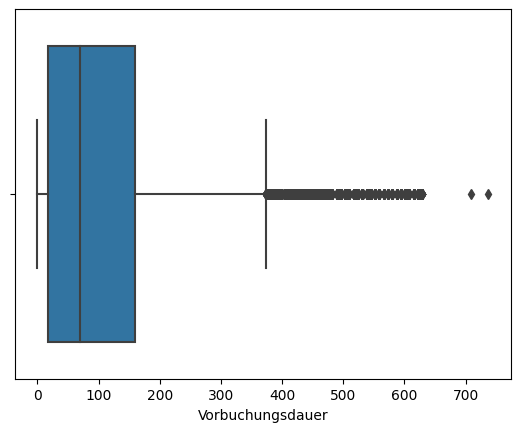

In [ ]:
# Create boxplot using seaborn
sns.boxplot(x=X_train['lead_time'])

# Set y axis label
plt.xlabel("Vorbuchungsdauer")

# Show the plot
plt.show()

In [ ]:
print(X_train['lead_time'].describe())

count    83573.000000
mean       103.708123
std        106.671013
min          0.000000
25%         18.000000
50%         69.000000
75%        160.000000
max        737.000000
Name: lead_time, dtype: float64


### Vergleich Cancellations

<Axes: xlabel='previous_cancellations', ylabel='Density'>

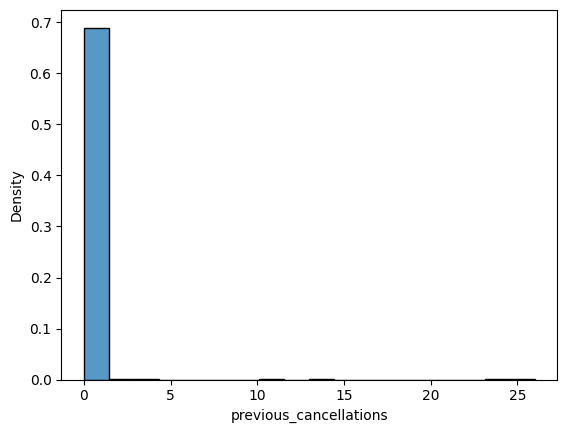

In [ ]:
sns.histplot(X_train['previous_cancellations'], kde=False, stat='density')

In [ ]:
sns.histplot(X_train['previous_bookings_not_canceled'], ax=axs[0, 1], kde=False, stat='density')

<Axes: xlabel='Buchnungen vorher nicht Storniert', ylabel='Anteil in Prozent'>

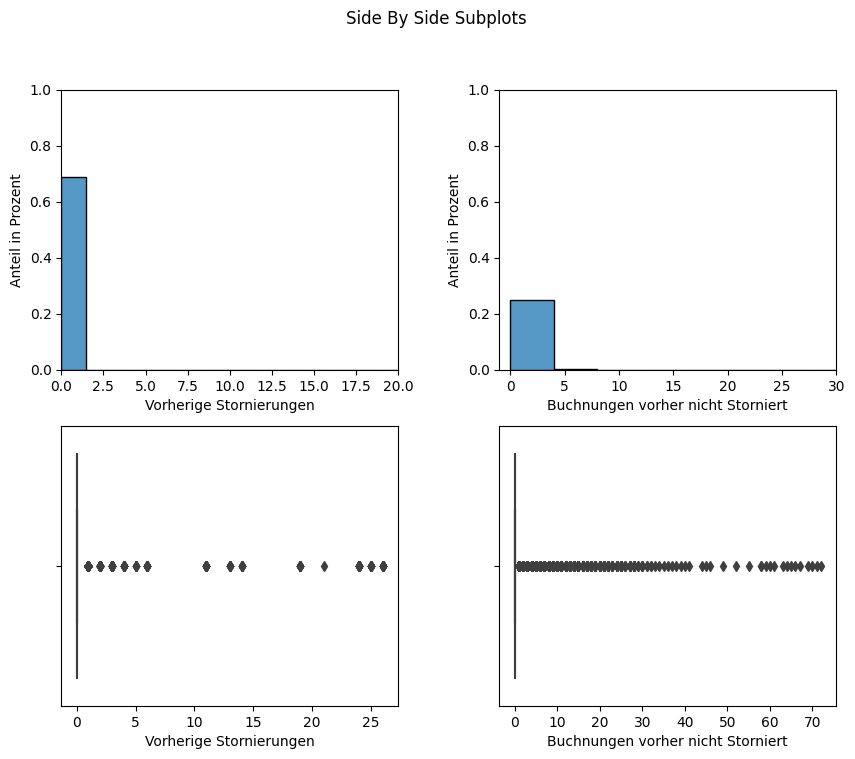

In [ ]:
# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Create histograms in the first row
sns.histplot(X_train['previous_cancellations'], ax=axs[0, 0], kde=False, stat='density')
sns.histplot(X_train['previous_bookings_not_canceled'], ax=axs[0, 1], kde=False, stat='density')

# Create boxplots in the second row
sns.boxplot(x=X_train['previous_cancellations'], ax=axs[1, 0])
sns.boxplot(x=X_train['previous_bookings_not_canceled'], ax=axs[1, 1])

# Set x and y axis labels and limits for histograms
axs[0, 0].set_xlabel('Vorherige Stornierungen')
axs[0, 0].set_ylabel('Anteil in Prozent')
axs[0, 0].set_xlim([0, 20])
axs[0, 0].set_ylim([0, 1])

axs[0, 1].set_xlabel('Buchnungen vorher nicht Storniert')
axs[0, 1].set_ylabel('Anteil in Prozent')
axs[0, 1].set_xlim([0, 2])
axs[0, 1].set_ylim([0, 1])

# Set x and y axis labels for boxplots
axs[1, 0].set_xlabel('Vorherige Stornierungen')

axs[1, 1].set_xlabel('Buchnungen vorher nicht Storniert')

# Set title for the figure
fig.suptitle('Side By Side Subplots')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

### Reservation Status Date

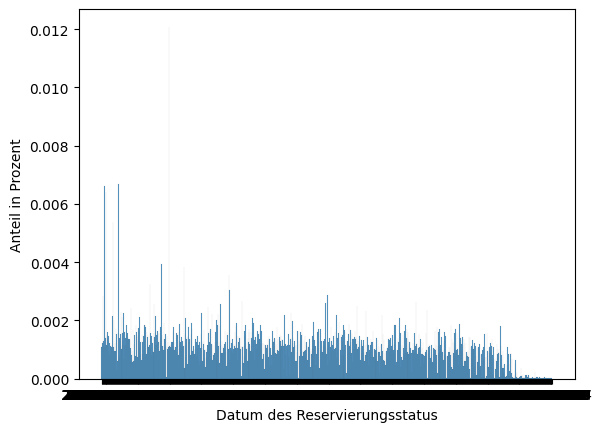

In [ ]:
sns.histplot(X_train['reservation_status_date'], kde=False, stat='density')
# Set x and y axis labels
plt.xlabel('Datum des Reservierungsstatus')
plt.ylabel('Anteil in Prozent')

# Show the plot
plt.show()

### Reservation State

In [ ]:
X_train.reservation_status.value_counts()

Check-Out    52795
Canceled     29954
No-Show        824
Name: reservation_status, dtype: int64

In [ ]:
ytrain.is_canceled.value_counts()

0    52795
1    30778
Name: is_canceled, dtype: int64

In [ ]:
29954+824

30778

### Dates Kontroll

/var/folders/0q/pm22jtdd02bfm5_kndmz7_3w0000gn/T/ipykernel_3056/1307559644.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 0.98, 'Darstellung der Anreise Datumsinformationen')

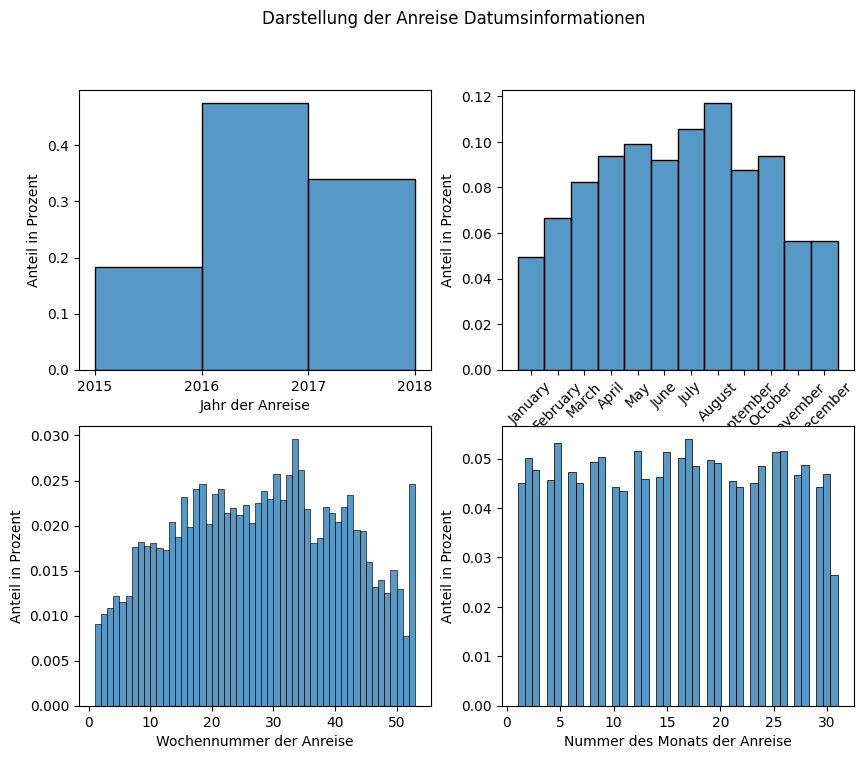

In [ ]:
# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Define the order of categories for the 'month' column
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


# Define the bins for the years
bins = [2015, 2016, 2017, 2018]
sns.histplot(X_train['arrival_date_year'], ax = axs[0,0], kde=False, stat='density',bins=bins)
sns.histplot(pd.Categorical(X_train['arrival_date_month'], categories=month_order, ordered=True), ax = axs[0,1], kde=False, stat='density')
sns.histplot(X_train['arrival_date_week_number'], ax = axs[1,0], kde=False, stat = 'density')
sns.histplot(X_train['arrival_date_day_of_month'], ax = axs[1,1], kde=False, stat='density')

# Set x and y axis labels and limits for histograms
axs[0, 0].set_xlabel('Jahr der Anreise')
axs[0, 0].set_ylabel('Anteil in Prozent')
axs[0,0].set_xticks(bins)

# rotate xticks
axs[0, 1].set_xlabel('Monat der Anreise')
axs[0, 1].set_ylabel('Anteil in Prozent')
# Rotate xticks in the first subplot
axs[0, 1].set_xticklabels(axs[0,1].get_xticklabels(), rotation=45)

axs[1, 0].set_xlabel('Wochennummer der Anreise')
axs[1, 0].set_ylabel('Anteil in Prozent')

axs[1, 1].set_xlabel('Nummer des Monats der Anreise')
axs[1, 1].set_ylabel('Anteil in Prozent')

# Set title for the figure
fig.suptitle('Darstellung der Anreise Datumsinformationen')



## Darstellung von Aufenthaltsdauer

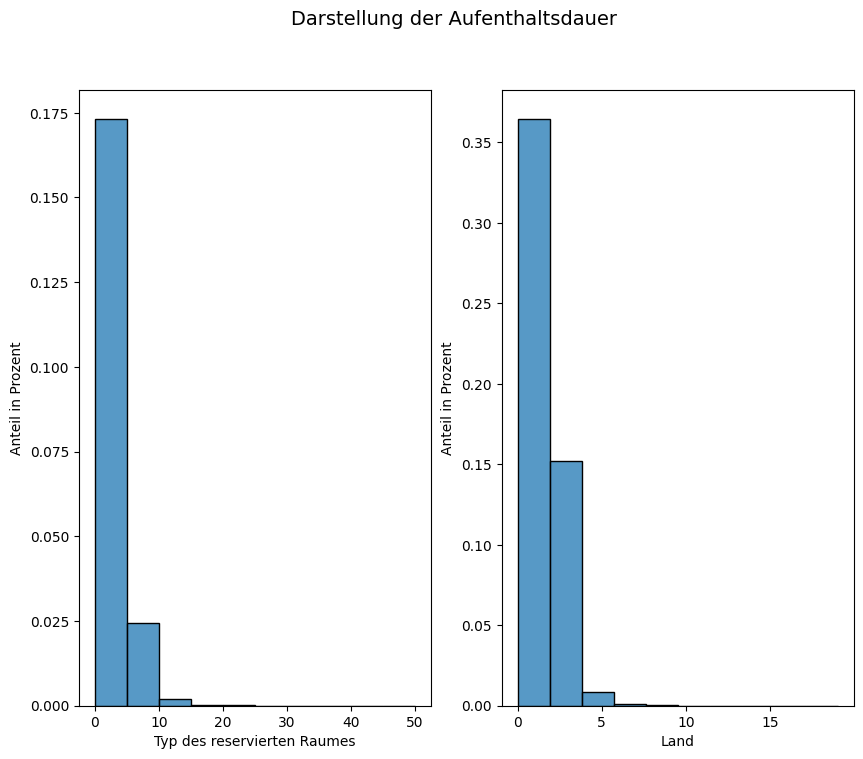

In [ ]:
# Create figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

sns.histplot(X_train['stays_in_week_nights'],ax=axs[0],kde=False,stat='density',bins=10)
sns.histplot(X_train['stays_in_weekend_nights'],ax=axs[1],kde=False,stat='density',bins=10)

# Set x and y axis labels for the first subplot
axs[0].set_xlabel('Länge der Aufenthaltsdauer unter der Woche')
axs[0].set_ylabel('Länge der Aufenthaltsdauer am Wochende')

# Set x and y axis labels for the second subplot
axs[1].set_xlabel('Land')
axs[1].set_ylabel('Anteil in Prozent')

# Set title for the figure
fig.suptitle('Darstellung der Aufenthaltsdauer', fontsize=14)
plt.show()

## Scatterplot Matrix

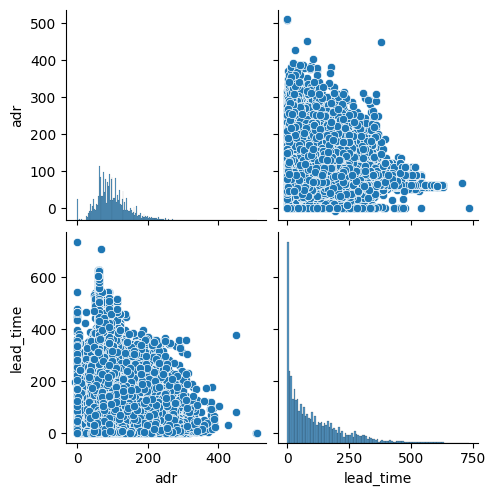

In [ ]:
sns.pairplot(X_train[['adr','lead_time']])


In [ ]:
corr_matrix = X_train.corr(numeric_only = True)
print(corr_matrix)

                                lead_time  arrival_date_day_of_month  \
lead_time                        1.000000                   0.003924   
arrival_date_day_of_month        0.003924                   1.000000   
stays_in_weekend_nights          0.090885                  -0.016857   
stays_in_week_nights             0.168470                  -0.025079   
adults                           0.117111                  -0.003410   
children                        -0.036711                   0.016227   
babies                          -0.022862                  -0.000534   
is_repeated_guest               -0.125335                  -0.006914   
previous_cancellations           0.086167                  -0.026311   
previous_bookings_not_canceled  -0.073989                   0.002597   
booking_changes                 -0.000160                   0.010027   
days_in_waiting_list             0.171872                   0.024858   
adr                             -0.063972                   0.03

In [ ]:
corr_matrix = X_train.corr(numeric_only = True).abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
print(sol)

agent_na                   company_na                        0.591037
stays_in_weekend_nights    stays_in_week_nights              0.501321
is_repeated_guest          previous_bookings_not_canceled    0.415488
children                   adr                               0.338804
is_repeated_guest          company_na                        0.295182
                                                               ...   
arrival_date_day_of_month  total_of_special_requests         0.002390
stays_in_week_nights       days_in_waiting_list              0.002122
arrival_date_day_of_month  company_na                        0.001732
                           babies                            0.000534
lead_time                  booking_changes                   0.000160
Length: 136, dtype: float64


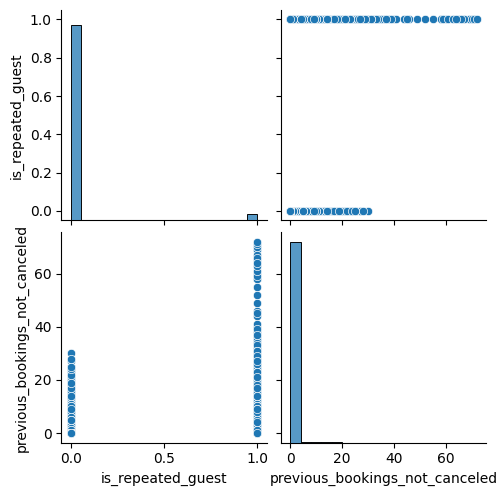

In [ ]:
sns.pairplot(X_train[['is_repeated_guest','previous_bookings_not_canceled']])

## Erkenntnisse
Aus den oberen Darstellungen kann ich einige Erkenntnisse entziehen, dies wichtig für den weiteren Verlauf.
Zum Beispiel sehe ich, dass ich in verschiedene kategorischen Werte hohe Kardinalität haben, welche wir im nächsten Schritt bearbeiten werden. Zusätzlich existieren Variablen wie Datum und Reservierungsstatus Datum die für die Analyse nicht von Relevanz sind. Diese Variablen werden wir nun im Anhang entfernen. Zur Sicherheit sollte man die Darstellungen auch für den Test Datensatz durchführen.

In [ ]:
print("Shape X_train vor der Änderung: {}".format(X_train.shape))
X_train = X_train.drop(columns = ['arrival_date_year','arrival_date_week_number','reservation_status_date','reservation_status'])
print("Shape X_train nach der Änderung: {}".format(X_train.shape))

Shape X_train vor der Änderung: (83573, 31)
Shape X_train nach der Änderung: (83573, 27)


In [ ]:
print("Shape X_test vor der Änderung: {}".format(X_test.shape))
X_test = X_test.drop(columns = ['arrival_date_year','arrival_date_week_number','reservation_status_date',
                                'reservation_status'])
print("Shape X_test nach der Änderung: {}".format(X_test.shape))

Shape X_test vor der Änderung: (35817, 31)
Shape X_test nach der Änderung: (35817, 27)


## Speicherung der Daten

In [ ]:
X_train.to_csv("Xtrain_booking_mod.csv",index=False)
X_test.to_csv("Xtest_booking_mod.csv",index=False)